In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

#load the MNIST dataset from keras datasets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#Process data
X_train = X_train.reshape(-1, 28, 28, 1) # Expend dimension for 1 cahnnel image
X_test = X_test.reshape(-1, 28, 28, 1)  # Expend dimension for 1 cahnnel image
X_train = X_train / 255 # Normalize
X_test = X_test / 255 # Normalize

#One hot encoding
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

#Build LetNet model with Keras
def LetNet(width, height, depth, classes):
    # initialize the model
    model = Sequential()

    # first layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=6, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # second layer, convolution and pooling
    model.add(Conv2D(input_shape=(width, height, depth), kernel_size=(5, 5), filters=16, strides=(1,1), activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Fully connection layer
    model.add(Flatten())
    model.add(Dense(120,activation = 'tanh'))
    model.add(Dense(84,activation = 'tanh'))

    # softmax classifier
    model.add(Dense(classes))
    model.add(Activation("softmax"))

    return model

LetNet_model = LetNet(28,28,1,10)
LetNet_model.summary()
LetNet_model.compile(optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),loss = 'categorical_crossentropy',metrics=['accuracy'])

#Strat training
History = LetNet_model.fit(X_train, y_train, epochs=5, batch_size=32,validation_data=(X_test, y_test))


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          2416      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               30840     
_________________________________________________________________
dens

<Figure size 1500x500 with 2 Axes>

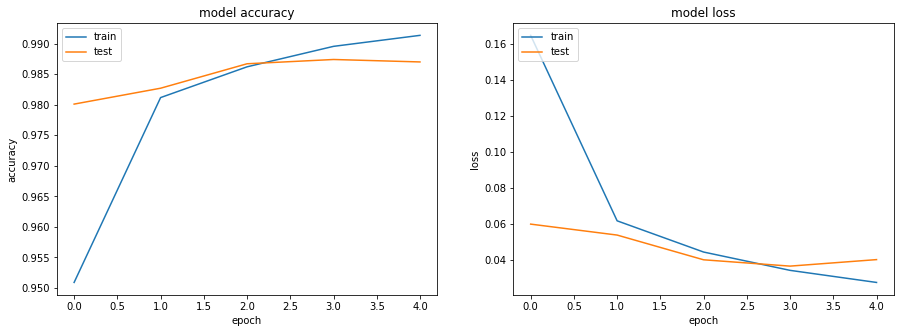

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.plot(History.history['acc'])
plt.plot(History.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.show()